In [1]:
# Imports
import pandas as pd
import datetime as dt

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [91]:
atg_obs = pd.read_csv('../../Downloads/LFEM_data-.csv', low_memory=False, skiprows=1)
atg_obs.insert(0, 'datetime_UTC', pd.to_datetime(atg_obs['Date'] + atg_obs['Time'], format='%Y-%m-%d%H:%M'))
# atg_obs_selected = atg_obs.loc[(atg_obs['datetime_UTC']>=dt.datetime(2020,5,1))].copy() # Selecting dates
atg_obs_selected = atg_obs.copy() # Selecting dates

In [92]:
atg_obs_selected

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,1999-07-30 00:09:00,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,1999-07-30 00:10:00,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,1999-07-30 00:11:00,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,1999-07-30 00:12:00,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,1999-07-30 00:13:00,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2024-04-30 19:28:00,2.460432e+06,2024-04-30,19:28,50.300000,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.00
12909356,2024-04-30 19:29:00,2.460432e+06,2024-04-30,19:29,50.100000,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.00
12909357,2024-04-30 19:30:00,2.460432e+06,2024-04-30,19:30,50.000000,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.00
12909358,2024-04-30 19:31:00,2.460432e+06,2024-04-30,19:31,50.000000,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.00


In [93]:
no_erros_obs = atg_obs_selected.loc[(atg_obs_selected['Rain']!='M')&(atg_obs_selected['Temperature']!='M')&(atg_obs_selected['Pressure']!='M')&(atg_obs_selected['Relhum']!='M')&(atg_obs_selected['Relhum']!='0.00.')].copy()
no_erros_obs['Rain'] = no_erros_obs['Rain'].astype(float)
no_erros_obs['Temperature'] = no_erros_obs['Temperature'].astype(float)
no_erros_obs['Pressure'] = no_erros_obs['Pressure'].astype(float)
no_erros_obs['Relhum'] = no_erros_obs['Relhum'].astype(float)

In [94]:
no_erros_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
255060,2000-01-26 22:54:00,2.451571e+06,2000-01-26,22:54,43.8,34.700000,70.1,3.500000,4.400000,89,1023.1,44.4,19.80,0.0
255061,2000-01-26 22:55:00,2.451571e+06,2000-01-26,22:55,43.4,34.100000,69.4,2.800000,3.300000,88,1023.1,48.1,19.80,0.0
255062,2000-01-26 22:56:00,2.451571e+06,2000-01-26,22:56,43.4,34.700000,71.0,3.300000,3.800000,86,1023.1,51.5,19.80,0.0
255063,2000-01-26 22:57:00,2.451571e+06,2000-01-26,22:57,43.5,35.000000,71.7,2.600000,3.600000,91,1023.1,55.2,19.80,0.0
255064,2000-01-26 22:58:00,2.451571e+06,2000-01-26,22:58,43.2,34.400000,71.0,1.900000,2.400000,85,1023.1,58.8,19.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909355,2024-04-30 19:28:00,2.460432e+06,2024-04-30,19:28,50.3,37.100000,60.3,6.500000,7.800000,281,1015.7,269.7,967.67,0.0
12909356,2024-04-30 19:29:00,2.460432e+06,2024-04-30,19:29,50.1,37.100000,60.8,5.000000,7.900000,358,1015.7,280.3,967.67,0.0
12909357,2024-04-30 19:30:00,2.460432e+06,2024-04-30,19:30,50.0,37.300000,61.3,5.500000,7.400000,318,1015.7,295.8,967.67,0.0
12909358,2024-04-30 19:31:00,2.460432e+06,2024-04-30,19:31,50.0,37.100000,61.1,8.900000,10.700000,292,1015.6,315.4,967.67,0.0


In [95]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1h')
first_obs_each_period

In [187]:
summed_rain_each_period = first_obs_each_period['Rain'].sum()

lightrainfall_times = summed_rain_each_period[(summed_rain_each_period<=0.10)&(summed_rain_each_period>0.0)]
moderaterainfall_times = summed_rain_each_period[(summed_rain_each_period<0.30)&(summed_rain_each_period>0.10)]
heavyrainfall_times = summed_rain_each_period[(summed_rain_each_period>0.30)]

any_rainfall_times = summed_rain_each_period[(summed_rain_each_period>0.0)]

# summed_rain_each_period.loc[lightrainfall_times.index] = 1
# summed_rain_each_period.loc[moderaterainfall_times.index] = 2
# summed_rain_each_period.loc[heavyrainfall_times.index] = 3
summed_rain_each_period.loc[any_rainfall_times.index] = 1

In [188]:
# Extract Date, Time, Temperature, SumRain into data array
atg_obs_necessary = pd.DataFrame()
atg_obs_necessary['date'] = first_obs_each_period['Date'].first()
atg_obs_necessary['time'] = first_obs_each_period['Time'].first()
atg_obs_necessary['temperature'] = first_obs_each_period['Temperature'].first()
atg_obs_necessary['pressure'] = first_obs_each_period['Pressure'].first()
atg_obs_necessary['relhum'] = first_obs_each_period['Relhum'].first()
atg_obs_necessary['rainfall_type'] = summed_rain_each_period

data_arr = atg_obs_necessary.values
atg_obs_necessary

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2000-01-26 22:00:00,2000-01-26,22:54,43.8,1023.1,70.1,0.0
2000-01-26 23:00:00,2000-01-26,23:00,43.4,1023.2,72.1,0.0
2000-01-27 00:00:00,2000-01-27,00:00,44.9,1023.5,66.6,0.0
2000-01-27 01:00:00,2000-01-27,01:00,44.1,1024.0,71.0,0.0
2000-01-27 02:00:00,2000-01-27,02:00,43.7,1024.3,74.0,0.0
...,...,...,...,...,...,...
2024-04-30 15:00:00,2024-04-30,15:00,46.2,1014.8,71.0,0.0
2024-04-30 16:00:00,2024-04-30,16:00,45.0,1015.1,71.9,0.0
2024-04-30 17:00:00,2024-04-30,17:00,44.6,1015.5,77.5,0.0


In [191]:
atg_obs_necessary.loc[atg_obs_necessary['rainfall_type']==1]

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2000-01-31 01:00:00,2000-01-31,01:00,46.6,1004.7,48.8,1.0
2000-01-31 15:00:00,2000-01-31,15:00,40.6,1013.5,87.4,1.0
2000-02-01 02:00:00,2000-02-01,02:00,48.1,1006.6,55.7,1.0
2000-02-01 03:00:00,2000-02-01,03:00,45.3,1005.9,67.9,1.0
2000-02-01 04:00:00,2000-02-01,04:00,43.1,1004.7,84.5,1.0
...,...,...,...,...,...,...
2024-04-29 20:00:00,2024-04-29,20:00,52.6,1014.2,58.3,1.0
2024-04-30 00:00:00,2024-04-30,00:00,50.7,1014.3,61.5,1.0
2024-04-30 01:00:00,2024-04-30,01:00,47.9,1014.4,76.0,1.0


In [192]:
atg_obs_train = atg_obs_necessary.loc[pd.to_datetime(atg_obs_necessary['date'], format='%Y-%m-%d')<dt.datetime(2020,5,1)]
atg_obs_train

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2000-01-26 22:00:00,2000-01-26,22:54,43.8,1023.1,70.1,0.0
2000-01-26 23:00:00,2000-01-26,23:00,43.4,1023.2,72.1,0.0
2000-01-27 00:00:00,2000-01-27,00:00,44.9,1023.5,66.6,0.0
2000-01-27 01:00:00,2000-01-27,01:00,44.1,1024.0,71.0,0.0
2000-01-27 02:00:00,2000-01-27,02:00,43.7,1024.3,74.0,0.0
...,...,...,...,...,...,...
2020-04-30 19:00:00,2020-04-30,19:00,55.3,1015.0,52.4,0.0
2020-04-30 20:00:00,2020-04-30,20:00,56.1,1015.1,51.6,0.0
2020-04-30 21:00:00,2020-04-30,21:00,56.2,1015.2,56.2,0.0


In [ ]:
notable_event_times = atg_obs_train.loc[atg_obs_train['rainfall_type']>=2].index

relevant_times_train = pd.DataFrame()
for event_time in notable_event_times:
    time_around_event = atg_obs_train.loc[event_time-pd.Timedelta(hours=12):event_time+pd.Timedelta(hours=12)].copy()
    relevant_times_train = pd.concat([relevant_times_train, time_around_event])
relevant_times_train

In [161]:
atg_obs_test = atg_obs_necessary.loc[pd.to_datetime(atg_obs_necessary['date'], format='%Y-%m-%d')>=dt.datetime(2020,5,1)]
atg_obs_test

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2020-05-01 00:00:00,2020-05-01,00:00,55.6,1015.2,57.7,0.0
2020-05-01 01:00:00,2020-05-01,01:00,55.8,1015.4,53.3,0.0
2020-05-01 02:00:00,2020-05-01,02:00,54.1,1015.6,56.9,0.0
2020-05-01 03:00:00,2020-05-01,03:00,53.5,1015.8,61.1,0.0
2020-05-01 04:00:00,2020-05-01,04:00,52.1,1016.5,65.7,0.0
...,...,...,...,...,...,...
2024-04-30 15:00:00,2024-04-30,15:00,46.2,1014.8,71.0,0.0
2024-04-30 16:00:00,2024-04-30,16:00,45.0,1015.1,71.9,0.0
2024-04-30 17:00:00,2024-04-30,17:00,44.6,1015.5,77.5,0.0


In [162]:
notable_event_times = atg_obs_test.loc[atg_obs_test['rainfall_type']>=2].index

relevant_times_test = pd.DataFrame()
for event_time in notable_event_times:
    time_around_event = atg_obs_test.loc[event_time-pd.Timedelta(hours=12):event_time+pd.Timedelta(hours=12)].copy()
    relevant_times_test = pd.concat([relevant_times_test, time_around_event])
relevant_times_test

,date,time,temperature,pressure,relhum,rainfall_type
datetime_UTC,,,,,,
2020-05-16 17:00:00,2020-05-16,17:00,56.3,1006.8,74.7,1.0
2020-05-16 18:00:00,2020-05-16,18:00,57.4,1006.4,78.2,0.0
2020-05-16 19:00:00,2020-05-16,19:00,60.0,1005.4,75.1,0.0
2020-05-16 20:00:00,2020-05-16,20:00,57.1,1005.5,73.9,1.0
2020-05-16 21:00:00,2020-05-16,21:00,58.5,1005.5,76.1,1.0
...,...,...,...,...,...,...
2024-04-30 09:00:00,2024-04-30,09:00,45.3,1015.0,74.4,1.0
2024-04-30 10:00:00,2024-04-30,10:00,44.3,1014.8,77.8,0.0
2024-04-30 11:00:00,2024-04-30,11:00,43.8,1014.9,79.1,0.0


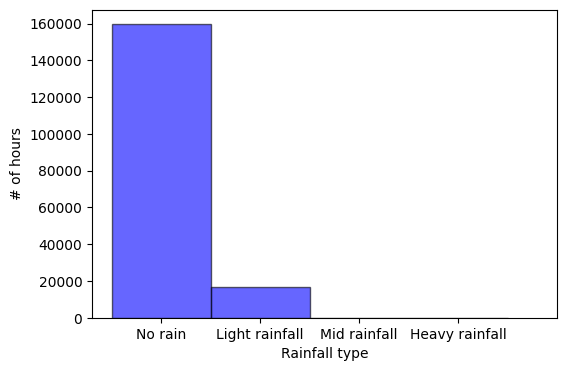

(array([159568,  16689,      0,      0]), array([0, 1, 2, 3, 4]))

In [194]:
rain_counts, classes = np.histogram(atg_obs_train['rainfall_type'].values, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0,5))
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
# plt.yscale('log')
plt.show()
rain_counts, classes

In [195]:
atg_obs_train.shape[0], atg_obs_test.shape[0]

(176257, 33823)

In [196]:
train_test_split = 100*(atg_obs_train.shape[0] / (atg_obs_train.shape[0]+atg_obs_test.shape[0]))
train_test_split, 100-train_test_split

(83.89994287890327, 16.100057121096725)

In [197]:
def get_processed_df_from_data(dataset):
    date_objs = pd.to_datetime(dataset['date'], format="%Y-%m-%d")
    time_objs = pd.to_datetime(dataset['time'], format='%H:%M')

    days_of_year = pd.DatetimeIndex(date_objs).dayofyear
    months = pd.DatetimeIndex(date_objs).month
    times_in_hours_from_zero = (pd.DatetimeIndex(time_objs).hour + (pd.DatetimeIndex(time_objs).minute/60))

    processed_df = pd.DataFrame()
    processed_df['months_from_july'] = (np.abs(months - 7))
    # processed_df['days_of_year'] = days_of_year
    # processed_df['times_in_hours_from_zero'] = times_in_hours_from_zero

    vals = dataset['temperature']
    med_val = vals.median()
    dif_vals = np.abs(vals-med_val)
    max_normval = dif_vals.max()
    norm_vals = 1-(dif_vals/max_normval)
    processed_df['feature_1'] = norm_vals.values

    vals = dataset['relhum']
    med_val = vals.median()
    dif_vals = np.abs(vals-med_val)
    max_normval = dif_vals.max()
    norm_vals = 1-(dif_vals/max_normval)
    processed_df['feature_2'] = norm_vals.values

    vals = dataset['pressure']
    med_val = vals.median()
    dif_vals = np.abs(vals-med_val)
    max_normval = dif_vals.max()
    norm_vals = 1-(dif_vals/max_normval)
    processed_df['feature_3'] = norm_vals.values

    processed_df['class'] = dataset['rainfall_type'].values
    return processed_df

In [198]:
processed_df_train = get_processed_df_from_data(atg_obs_train)

In [199]:
processed_df_test = get_processed_df_from_data(atg_obs_test)

In [200]:
processed_df_train.loc[processed_df_train['class']==3]

,months_from_july,feature_1,feature_2,feature_3,class


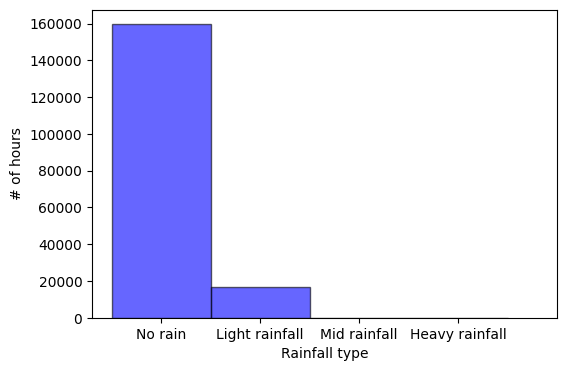

(array([159568,  16689,      0,      0]), array([0, 1, 2, 3, 4]))

In [201]:
rain_counts, classes = np.histogram(processed_df_train['class'].values, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
# plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4), width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0,5))
plt.ylabel('# of hours')
plt.xticks(ticks=np.arange(0,4), labels=['No rain', 'Light rainfall', 'Mid rainfall', 'Heavy rainfall'])
plt.xlabel('Rainfall type')
plt.show()
rain_counts, classes

In [202]:
processed_data_train = processed_df_train.values.astype(float)

In [203]:
processed_data_train.shape

(176257, 5)

In [204]:
processed_data_test = processed_df_test.values.astype(float)

In [205]:
processed_data_test.shape

(33823, 5)

In [206]:
print(f'Data Shape: {data_arr.shape}')
print(f'Data Entry: [Date, Time, Temperature, Rain]')

# Pre-Processed
print(data_arr[0])

# Post-Processed
print(processed_data_train[0])

Data Shape: (212662, 6)
Data Entry: [Date, Time, Temperature, Rain]
['2000-01-26' '22:54' 43.8 1023.1 70.1 0.0]
[6.         0.84504505 0.97496523 0.7744186  0.        ]


In [207]:
x_data_train = processed_data_train[:, :4]
y_data_train = processed_data_train[:, 4:]
print(x_data_train[0], y_data_train[0])

[6.         0.84504505 0.97496523 0.7744186 ] [0.]


In [208]:
processed_data_test

array([[2.        , 0.96373057, 0.76369863, 0.95728643, 0.        ],
       [2.        , 0.9611399 , 0.68835616, 0.95226131, 0.        ],
       [2.        , 0.98316062, 0.75      , 0.94723618, 0.        ],
       ...,
       [3.        , 0.89378238, 0.89726027, 0.94974874, 0.        ],
       [3.        , 0.9261658 , 0.96232877, 0.94472362, 0.        ],
       [3.        , 0.95466321, 0.79452055, 0.94723618, 0.        ]])

In [209]:
x_data_test = processed_data_test[:, :4]
y_data_test = processed_data_test[:, 4:]
print(x_data_test[0], y_data_test[0])

[2.         0.96373057 0.76369863 0.95728643] [0.]


In [212]:
# Simple Model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Compile
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [213]:
# Train the Model:
model.fit(x_data_train, y_data_train, epochs=50)

Epoch 1/50


2024-05-20 23:06:30.330040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5509/5509 [==============================] - 32s 6ms/step - loss: 0.0824 - accuracy: 0.5043
Epoch 2/50
5509/5509 [==============================] - 31s 6ms/step - loss: 0.0807 - accuracy: 0.4887
Epoch 3/50
5509/5509 [==============================] - 31s 6ms/step - loss: 0.0797 - accuracy: 0.5012
Epoch 4/50
5509/5509 [==============================] - 30s 5ms/step - loss: 0.0789 - accuracy: 0.5000
Epoch 5/50
5509/5509 [==============================] - 33s 6ms/step - loss: 0.0784 - accuracy: 0.5026
Epoch 6/50
5509/5509 [==============================] - 33s 6ms/step - loss: 0.0780 - accuracy: 0.5127
Epoch 7/50
5509/5509 [==============================] - 31s 6ms/step - loss: 0.0778 - accuracy: 0.5126
Epoch 8/50
5509/5509 [==============================] - 29s 5ms/step - loss: 0.0778 - accuracy: 0.4721
Epoch 9/50
5509/5509 [==============================] - 29s 5ms/step - loss: 0.0776 - accuracy: 0.5056
Epoch 10/50
5509/5509 [==============================] - 31s 6ms/step - loss: 0.0776

In [181]:
# Evaluation (Is it worth, the loss is quite high suggesting that either the model architecture is quite poor (likely) or 
# that we need to better preprocess our data such as rain (also likely))

In [215]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [216]:
predictions = probability_model.predict(x_data_test)

  90/1057 [=>............................] - ETA: 1s

2024-05-20 23:36:16.854481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1057/1057 [==============================] - 1s 1ms/step


In [217]:
np.argmax(predictions[0])

0

In [218]:
y_data_test[0]

array([0.])

In [219]:
model.evaluate(x_data_test, y_data_test, verbose=2)

2024-05-20 23:36:24.666028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1057/1057 - 4s - loss: 0.1203 - accuracy: 0.5826 - 4s/epoch - 3ms/step


[0.12027880549430847, 0.582591712474823]